Title: Boston Housing Data
Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

We'll analyze the Boston Housing Data with numpy and matplotlib

In [1]:
import numpy as np
import pandas as pd

dataset = np.genfromtxt('/Users/owy1/codefellows/401/machine-learning/boston_housing_data.csv',delimiter='') 

pandadataset = pd.DataFrame(dataset, columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
print(pandadataset[:5]) #print first 5 rows of data with panadas because it looks better


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [2]:
"""
Task1: Find the median and average home values across all Boston Suburbs in dollars.
"""

data=dataset[:,13]
print("median home values across all Boston Suburbs in dollars", data)
print("average of median home values across all Boston Suburbs in $1000:", np.around(np.average(data),3))

median home values across all Boston Suburbs in dollars [ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   

In [3]:
"""
Task2: Find the median home value of the suburb with the newest houses.
"""
#get matrix index of lowest percentage owner-occupied units built prior to 1940
index = np.argwhere(dataset == np.min(dataset[:,6])) 
# print(index) #[41,6]
print("The median home value of the suburb with the newest houses in $1000:", dataset[41,13])

The median home value of the suburb with the newest houses in $1000: 26.6


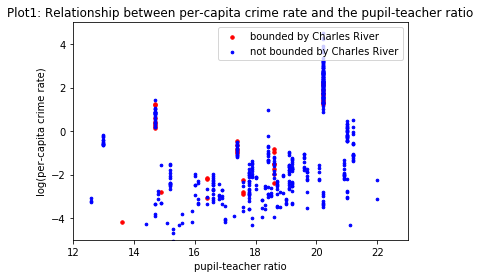

In [4]:
#Plot1
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
b=dataset[:,3]
subdata = dataset[:, [0, 10]]
# print(subdata[:5])
dataCHAS = subdata[b==1]
datanotCHAS = subdata[b==0]
# print(dataCHAS) #verifying dataCHAS
#print(datanotCHAS.shape) matrix size of housing data not bounded by Charles River (471, 14)

y1 = dataCHAS[:,0]
x1 = dataCHAS[:,1]
y2 = datanotCHAS[:,0]
x2 = datanotCHAS[:,1]
y1 = np.log(y1)
y2 = np.log(y2)

# print(dataCHAS.min(axis=0)) # 0.01501, 13.6
# print(dataCHAS.max(axis=0)) # 8.98296, 20.2
# print(datanotCHAS.min(axis=0)) # 0.00632, 12.6
# print(datanotCHAS.max(axis=0)) # 88.9762, 22


plt.scatter(x1, y1, color="red", label='bounded by Charles River', s=12)

plt.scatter(x2, y2, color="blue", label='not bounded by Charles River', s=7)

plt.title("Plot1: Relationship between per-capita crime rate and the pupil-teacher ratio")

plt.xlabel("pupil-teacher ratio")

plt.ylabel("log(per-capita crime rate)")

plt.legend(loc='upper right')

plt.xlim(12, 23)
plt.ylim(-5, 5)

plt.show()

Per plot1, there seems to be more crime when pupil-teacher ratio > 15. 
It does not seem to contrast much between the area bounded by Charles River, although there are not as many neighborhood bounded by the river as those not bounded by it.

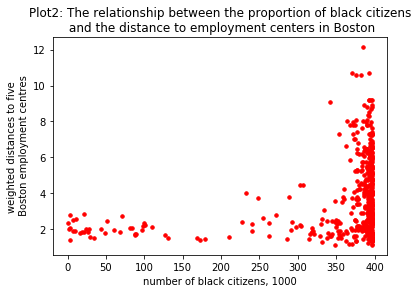

In [5]:
#Plot2
subdata = dataset[:, [7, 11]]

y = subdata[:,0]
x = subdata[:,1]

# print(subdata[:5]) # verify data

plt.scatter(x, y, color="red", s=12)

plt.title("Plot2: The relationship between the proportion of black citizens\n and the distance to employment centers in Boston")

plt.xlabel("number of black citizens, 1000")

plt.ylabel("weighted distances to five\n Boston employment centres")


plt.show()

Per plot 2, there doesn't seem to have a relationship between the number of black citizens and the distance to Boston employment center.  Not sure about the area where x around 400000 people.

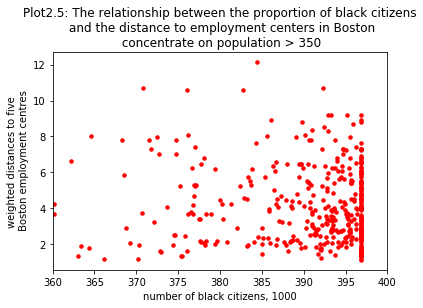

In [6]:
#Plot2.5
subdata = dataset[:, [7, 11]]

y = subdata[:,0]
x = subdata[:,1]

# print(subdata[:5]) # verify data

plt.scatter(x, y, color="red", s=12)

plt.title("Plot2.5: The relationship between the proportion of black citizens\n and the distance to employment centers in Boston\n concentrate on population > 350")

plt.xlabel("number of black citizens, 1000")

plt.ylabel("weighted distances to five\n Boston employment centres")

plt.xlim(360, 400)
plt.show()

no, plot2.5 doesn't tell me anything.

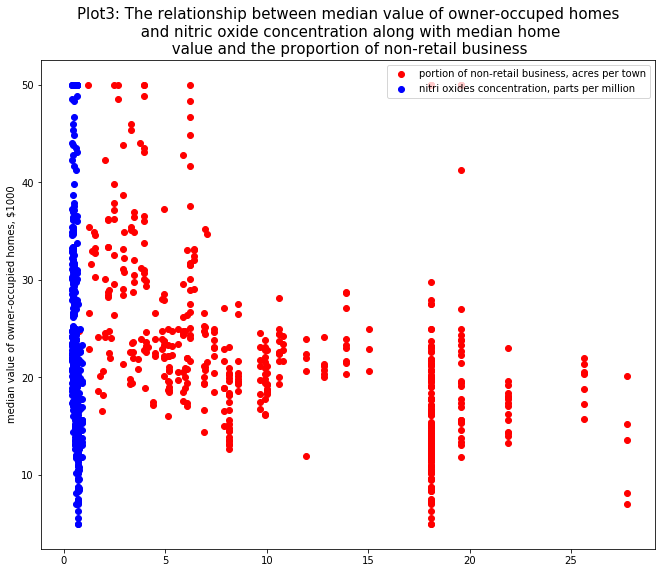

In [8]:
#Plot3
subdata = dataset[:, [2, 4, 13]]
# print(subdata[:5]) #verify data

y = subdata[:,2]
x1 = subdata[:,0]
x2 = subdata[:,1]
#print (y[:5])

plt.scatter(x1, y, color="red", label='portion of non-retail business, acres per town')

plt.scatter(x2, y, color="blue", label='nitri oxides concentration, parts per million')

plt.title("Plot3: The relationship between median value of owner-occuped homes\n and nitric oxide concentration along with median home\n value and the proportion of non-retail business", fontsize = 15)

plt.xlabel("")

plt.ylabel("median value of owner-occupied homes, $1000", fontsize = 10)

plt.legend(loc='upper right')

# plt.figure(figsize=(2,2))
fig_size = plt.rcParams["figure.figsize"] #current size [6,4]
plt.rcParams["figure.figsize"] = [11,9]
plt.show()


plot3 shows there is a decrease in property value with increase non-retail (industrial) businesses.